Données provenant de [https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/](https://www.data.gouv.fr/fr/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import json
import geopandas as gpd
from utils import getInputs, drawMap
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
# enable completion
%config Completer.use_jedi = False

In [2]:
com = gpd.read_file('input/communes-20210101-shp/communes-20210101.shp') #limites des communes
route = gpd.read_file('input/auvergne-latest-free.shp/gis_osm_roads_free_1.shp') # routes en auvergne

In [3]:
#communes = ['63113',  '63014', '63124', '63141', '63075', '63070',
#            '63254', '63193', '63284', '63019', '63164', '63063',
#            '63042', '63308', '63272', '63307', '63032',
#            '63042', '63099', '63263', '63345']

communes = ['63113', '63075']

# get municipality boundaries
metro = com[com.insee.isin(communes)]

# get roads
route_clipped = gpd.clip(route, metro)

In [4]:
annee = ['2019']
#annee = ['2019', '2018', '2017', '2016', '2015']

df_list = []
vehic_list = []
usager_list = []

for an in annee:
    df_sel, vehic_sel, usager_sel = getInputs(an, communes)
    df_list.append(df_sel)
    vehic_list.append(vehic_sel)
    usager_list.append(usager_sel)

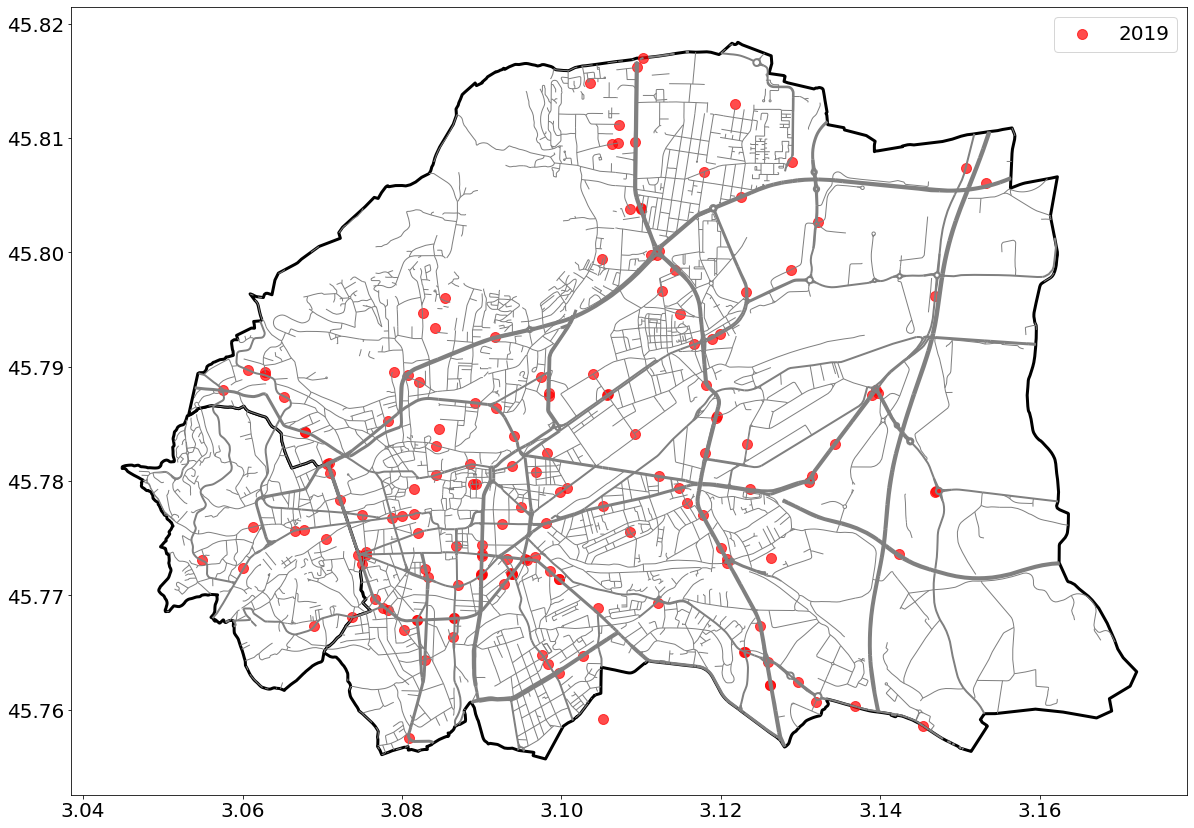

In [5]:
drawMap(df_list, vehic_list, usager_list, annee, metro, route_clipped)

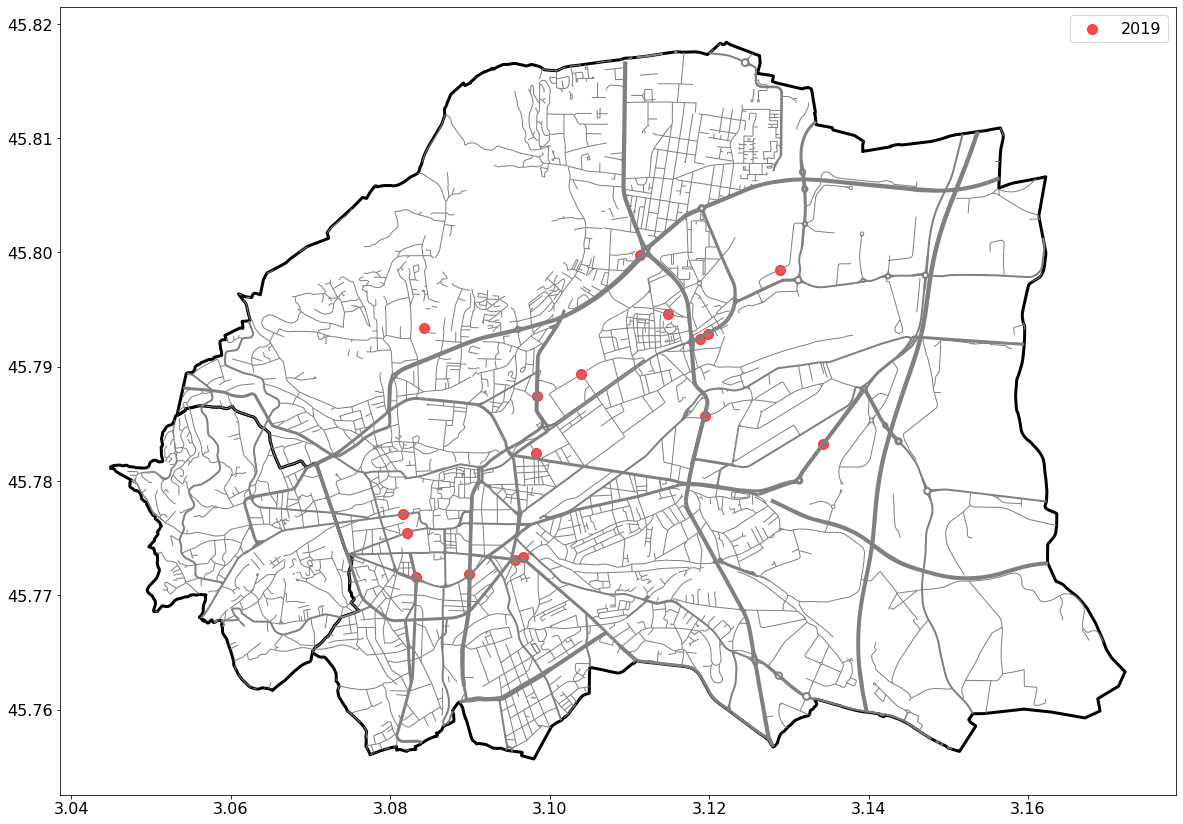

In [9]:
drawMap(df_list, vehic_list, usager_list, annee, metro, route_clipped, vehic_type=1)

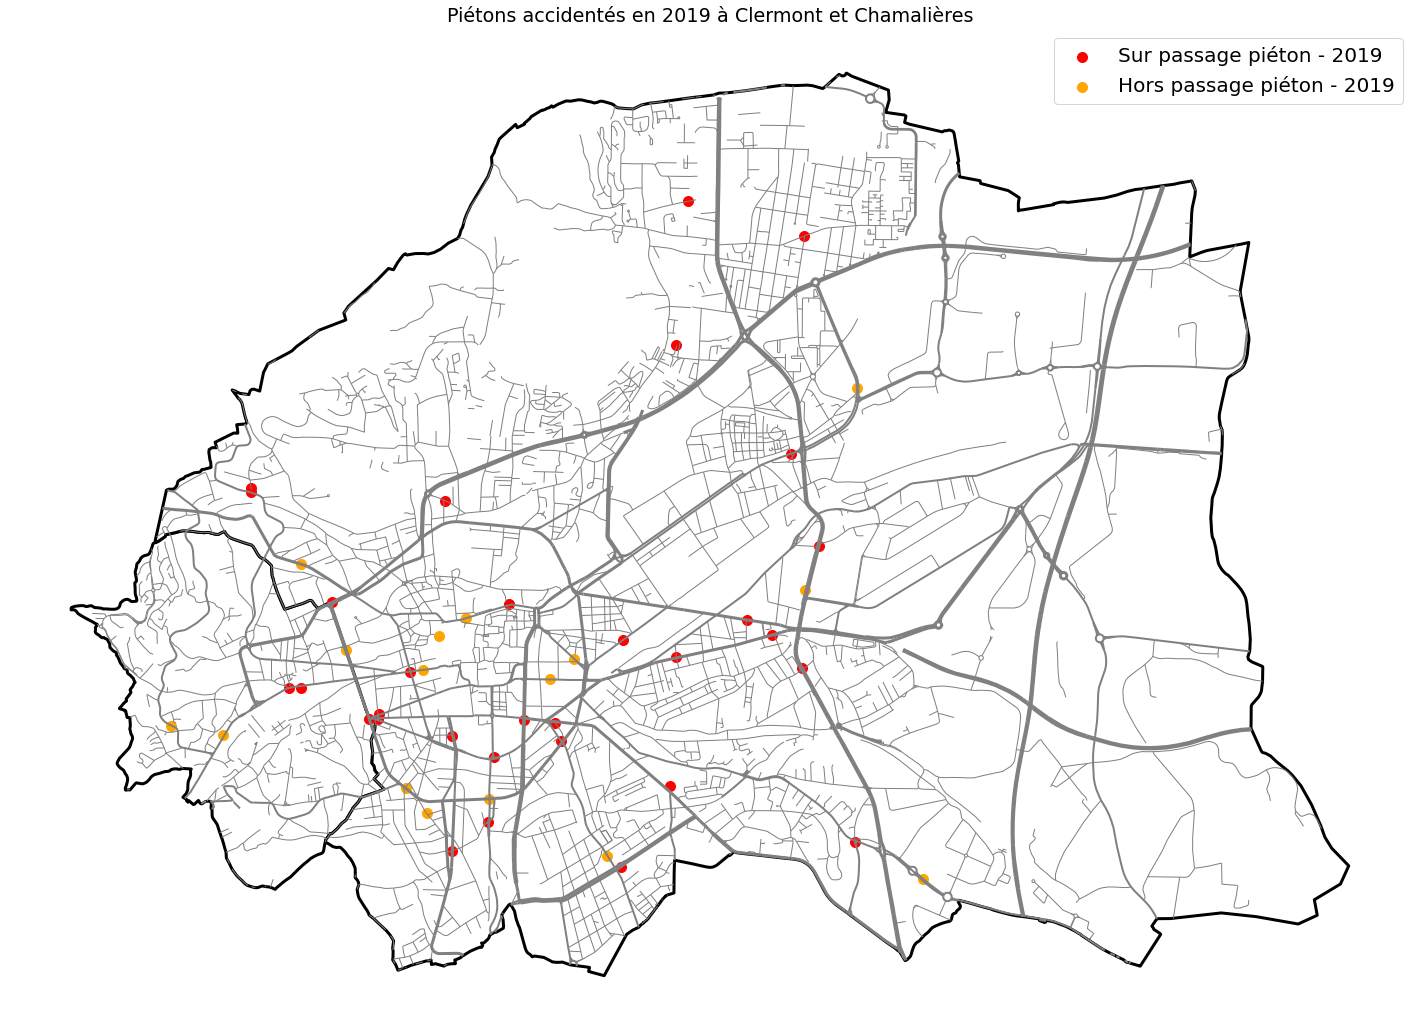

In [19]:
drawMap(df_list, vehic_list, usager_list, annee, metro, route_clipped, usager_type=3)
plt.title('Piétons accidentés en 2019 à Clermont et Chamalières')
plt.axis('off')
plt.tight_layout()
plt.savefig('pietons.jpg')

In [91]:
vehic_list[0][vehic_list[0].obsm==1]

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
177,201900000106,138 306 340,A01,1,7,0,1,1,15,1,NaN
1598,201900000962,138 304 788,A01,2,7,0,1,1,1,1,NaN
7254,201900004202,138 298 624,A01,1,30,0,1,8,13,1,NaN
8241,201900004781,138 297 468,A01,1,7,0,1,2,1,1,NaN
9576,201900005593,138 296 018,A01,2,7,0,1,1,1,1,NaN
9707,201900005669,138 295 869,A01,1,7,0,1,3,1,1,NaN
13009,201900007618,138 292 195,A01,2,7,0,1,1,1,1,NaN
13010,201900007619,138 292 194,A01,3,30,0,1,7,1,1,NaN
14966,201900008797,138 290 055,A01,1,10,0,1,1,1,1,NaN
18982,201900011156,138 285 777,A01,1,37,0,1,2,1,1,1.0


In [100]:
vehic_list[0][vehic_list[0].obsm==1].catv.value_counts()

7     38
10     3
30     2
37     2
14     1
40     1
Name: catv, dtype: int64

In [102]:
vehic_list[0][vehic_list[0].catv==1].obsm.value_counts()

2    16
0     2
Name: obsm, dtype: int64

In [103]:
vehic_list[0][vehic_list[0].catv==1].obs.value_counts()

0    17
8     1
Name: obs, dtype: int64

In [95]:
usager_pieton = usager_list[0][usager_list[0].catu==3]

In [101]:
usager_pieton

,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
221,201900000106,138 306 340,A01,10,3,4,2,1957,0,8,0,-1,3,3,1
2081,201900000962,138 304 788,A01,10,3,3,1,1982,0,0,-1,-1,3,3,2
9439,201900004202,138 298 624,A01,10,3,4,2,1985,5,8,0,-1,0,1,1
12622,201900005593,138 296 018,A01,10,3,4,2,1990,5,0,-1,-1,3,3,1
12809,201900005669,138 295 869,A01,10,3,4,2,1969,0,8,0,-1,3,3,1
17224,201900007618,138 292 195,A01,10,3,3,1,1995,5,0,-1,-1,2,3,1
17226,201900007619,138 292 194,A01,10,3,4,2,1954,9,0,-1,-1,3,3,1
19855,201900008797,138 290 055,A01,10,3,4,1,1986,0,8,0,-1,3,3,1
25194,201900011156,138 285 777,A01,10,3,4,2,2008,0,8,0,-1,1,3,1
29840,201900013192,138 281 927,A01,10,3,4,2,1985,0,8,0,-1,1,3,1


In [96]:
usager_pieton.grav.value_counts()

4    30
3    17
2     1
Name: grav, dtype: int64

In [97]:
usager_pieton.actp.value_counts()

3    39
9     3
5     3
B     2
1     1
Name: actp, dtype: int64

In [99]:
usager_pieton.locp.value_counts()

3    18
4    14
2     5
1     4
9     4
5     2
0     1
Name: locp, dtype: int64

In [5]:
df_sel, vehic_sel, usager_sel = getInputs('2019', ['94069'])

In [6]:
usager_pieton = usager_list[0][usager_list[0].catu==3]

NameError: name 'usager_list' is not defined

In [17]:
import osmnx as ox
place_name = "Clermont-Ferrand"
graph = ox.graph_from_place(place_name, network_type='bike')

/home/theo/anaconda3/envs/geo-env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


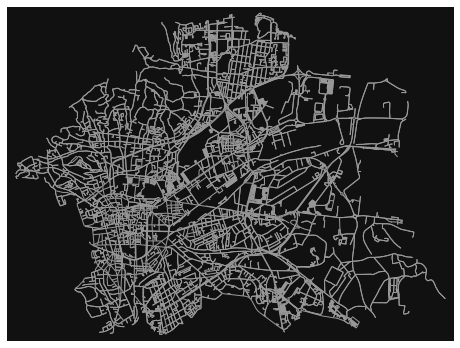

<AxesSubplot:>

<Figure size 1440x1440 with 0 Axes>

In [18]:
fig, ax = ox.plot_graph(graph, node_size=0)
gdf = gpd.GeoDataFrame(df_list[0], geometry=gpd.points_from_xy(df_list[0].long, df_list[0].lat))
gdf.plot(ax=ax, label='2019', alpha=0.7)

In [19]:
city = ox.geocode_to_gdf(place_name)

/home/theo/anaconda3/envs/geo-env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
geo = ox.geometries_from_place(place_name, tags={'highway':True})

/home/theo/anaconda3/envs/geo-env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


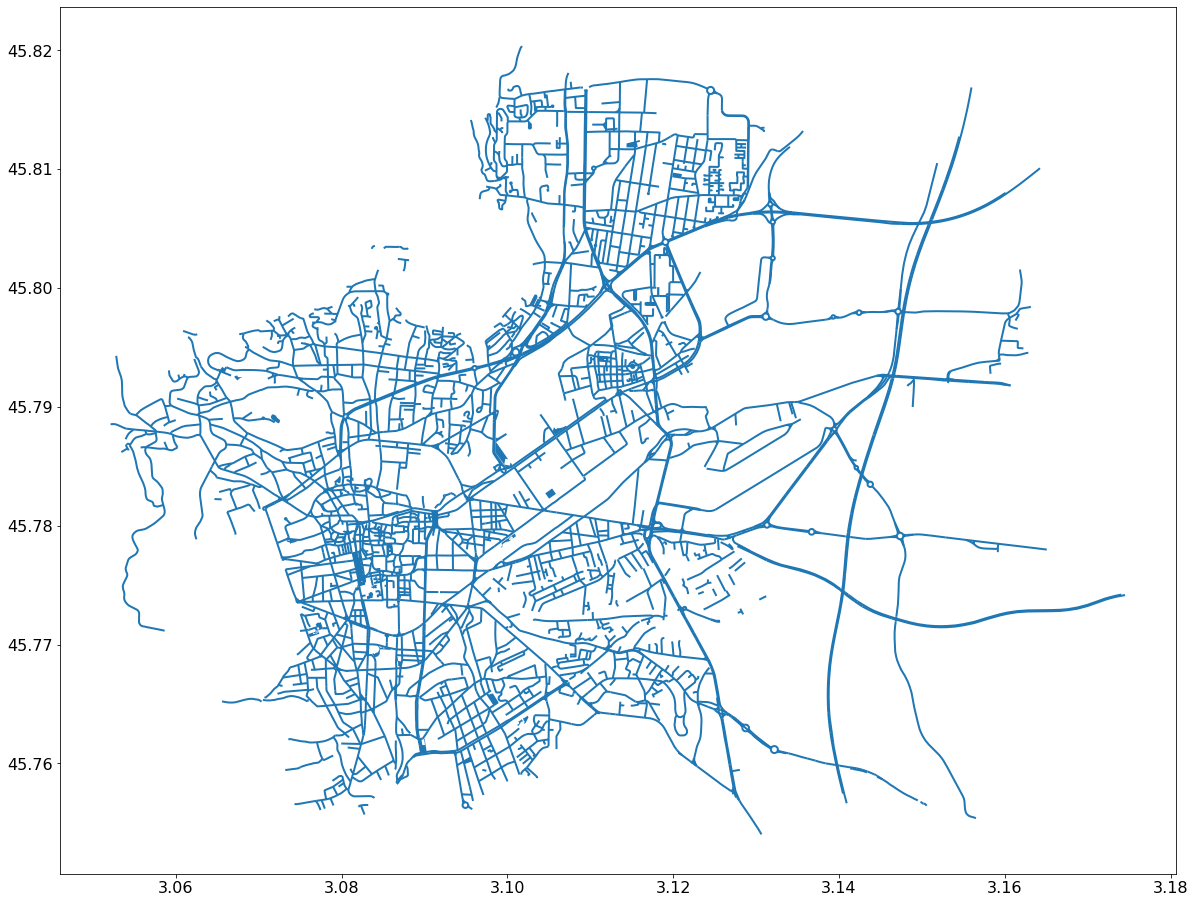

In [46]:
mask = geo.highway.isin(['pedestrian', 'primary', 'primary_link', 'secondary', 'secondary_link',
                         'tertiary', 'tertiary_link', 'residential', 'motorway'])
ax = geo[mask].plot()
#gdf = gpd.GeoDataFrame(df_list[0], geometry=gpd.points_from_xy(df_list[0].long, df_list[0].lat))
#gdf.plot(ax=ax, label='2019', alpha=0.7)

In [27]:
np.unique(geo.highway)

/home/theo/anaconda3/envs/geo-env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['bus_stop', 'construction', 'corridor', 'crossing',
       'crossing;bus_stop', 'cycleway', 'elevator',
       'emergency_access_point', 'footway', 'give_way', 'living_street',
       'milestone', 'mini_roundabout', 'motorway', 'motorway_junction',
       'motorway_link', 'path', 'pedestrian', 'platform', 'primary',
       'primary_link', 'proposed', 'residential', 'rest_area', 'road',
       'secondary', 'secondary_link', 'service', 'speed_camera', 'steps',
       'stop', 'street_lamp', 'tertiary', 'tertiary_link', 'track',
       'traffic_signals', 'trunk', 'trunk_link', 'turning_circle',
       'turning_loop', 'unclassified'], dtype=object)